In [1]:
using DataFrames, Chain, Statistics, CSV, StatsBase
ENV["DATAFRAMES_ROWS"]= 10

10

In [2]:
olympics = CSV.read("athlete_events.csv",DataFrame, missingstring = "NA")

Row,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,Int64,String,String1,Int64?,Int64?,Float64?,String,String3,String15,Int64,String7,String31,String31,String,String7?
1,1,A Dijiang,M,24,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,missing
2,2,A Lamusi,M,23,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,missing
3,3,Gunnar Nielsen Aaby,M,24,missing,missing,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,missing
4,4,Edgar Lindenau Aabye,M,34,missing,missing,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,missing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
271112,135569,Andrzej ya,M,29,179,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,missing
271113,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",missing
271114,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",missing


### What is the total number of medals given in all Olympics in the dataset?

In [4]:
@chain olympics begin
  dropmissing(:Medal)
  nrow
end

39783

### Which athlete had the most Olympic gold medals in the Summer 2000 games? How many medals?

In [5]:
@chain olympics begin
  dropmissing(:Medal)
  subset([:Games, :Medal] => (g, m)  -> g .== "2000 Summer" .&& m .== "Gold")
  groupby(:ID)
  combine(:Name =>  (names -> first(names)) => :Name, nrow)
  sort(:nrow, rev = true)
  first(10)
end

Row,ID,Name,nrow
,Int64,String,Int64
1,25975,Inge de Bruijn,3
2,63912,Lenny Krayzelburg,3
3,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",3
4,120087,Ian James Thorpe,3
5,134980,"Leontine Martha Henrica Petronella ""Leontien"" Zijlaard-van Moorsel",3
6,3281,Simona Amnar (-Tabr),2
7,7303,Flicia Michele Sylviane Ballanger (-Vetu),2
8,8285,Robert Bartko,2
9,10160,Brooke Marie Bennett (-Frioud),2


### Collectively taking each summer Olympics, give the top 10 athletes by number of medals.

In [6]:
@chain olympics begin
  subset(:Season => s-> s .== "Summer")
  dropmissing(:Medal)
  groupby(:ID)
  combine(:Name =>  (names-> first(names)) => :Name, nrow)
  sort(:nrow, rev = true)
  first(5)
end

Row,ID,Name,nrow
,Int64,String,Int64
1,94406,"Michael Fred Phelps, II",28
2,67046,Larysa Semenivna Latynina (Diriy-),18
3,4198,Nikolay Yefimovich Andrianov,15
4,74420,Edoardo Mangiarotti,13
5,89187,Takashi Ono,13


### List the top 10 countries by medals in only winter Olympics.

In [7]:
@chain olympics begin
  dropmissing(:Medal)
  subset(:Season => s-> s .== "Winter")
  groupby(:NOC)
  combine(nrow)
  sort(:nrow, rev = true)
end

Row,NOC,nrow
,String3,Int64
1,USA,635
2,CAN,611
3,NOR,443
4,URS,440
5,SWE,428
⋮,⋮,⋮
42,LUX,2
43,PRK,2
44,UZB,1


### Plot the average weight for male and female in each year over the entire span of the Olympic games.

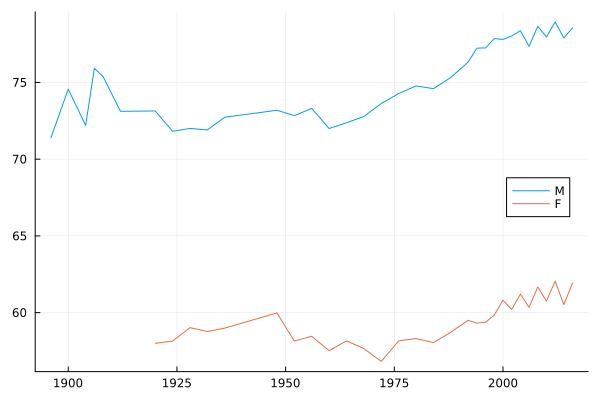

In [8]:
@chain olympics begin
  dropmissing(:Weight)
  groupby([:Year, :Sex])
  combine(:Weight => mean => :Mean_weight)
  unstack(:Sex, :Mean_weight)
  plot(_.Year, [_.M, _.F], label = ["M" "F"], legend = :right)
end

### Plot the number of medals that the U.S. collected over each olympic year

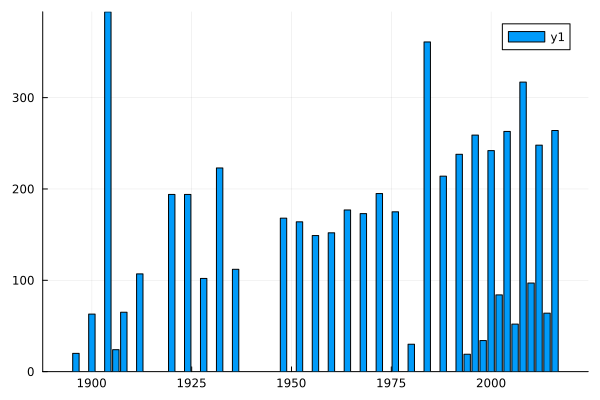

In [9]:
@chain olympics begin
  dropmissing(:Medal)
  subset(:NOC => name -> name .== "USA")
  groupby(:Year)
  combine(nrow)
  bar(_.Year, _.nrow)
end

### What age the most common athlete?  What we are looking for is the mode of the age of all athletes.

In [14]:
@chain olympics begin
combine(:Age => mode)
end


Row,Age_mode
,Int64
1,23
